# Digital Audio Processing 1

Date: 2023/08/20

Audio data from [this site](http://floor13.sakura.ne.jp/book03/book03.html)

In [1]:
import numpy as np
from scipy.io.wavfile import read, write
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from IPython.display import Audio

%matplotlib inline

In [2]:
def plot_wave(fs, data, title, ylim=(-1,1), max=1.0):
    num = data.shape[0]
    time = np.linspace(0., num/fs, num)

    fig, ax = plt.subplots(figsize=(12,2))
    ax.plot(time, data/max)   # Normalization (16bit: 2**16 * 2)
    ax.set_title(title)
    ax.set_xlabel('Time(sec)')
    ax.set_ylabel('Amplitude')
    ax.set_ylim(ylim)

In [3]:
Audio('data/guitar_A4.wav')

In [4]:
Audio('data/recorder_A4.wav')

## Wave Form

In [5]:
g_fs, g_data = read('data/guitar_A4.wav')
g_num = g_data.shape[0]
'Sampling frequency: {} Hz, the number of samples: {}, sampling time: {} sec'.format(g_fs, g_num, g_num/g_fs)

'Sampling frequency: 8000 Hz, the number of samples: 40000, sampling time: 5.0 sec'

In [6]:
r_fs, r_data = read('data/recorder_A4.wav')
r_num = r_data.shape[0]
'Sampling frequency: {} Hz, the number of samples: {}, sampling time: {} sec'.format(r_fs, r_num, r_num/r_fs)

'Sampling frequency: 8000 Hz, the number of samples: 40000, sampling time: 5.0 sec'

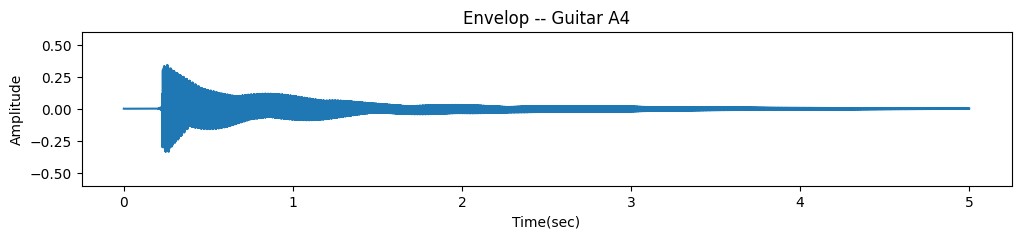

In [7]:
plot_wave(g_fs, g_data, 'Envelop -- Guitar A4', ylim=(-0.6, 0.6), max=2**15)

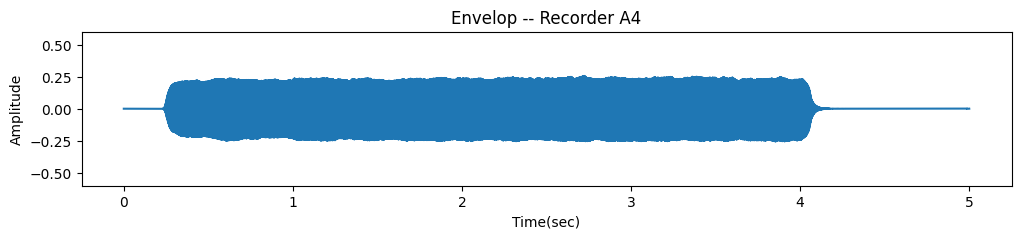

In [8]:
plot_wave(r_fs, r_data, 'Envelop -- Recorder A4', ylim=(-0.6, 0.6), max=2**15)

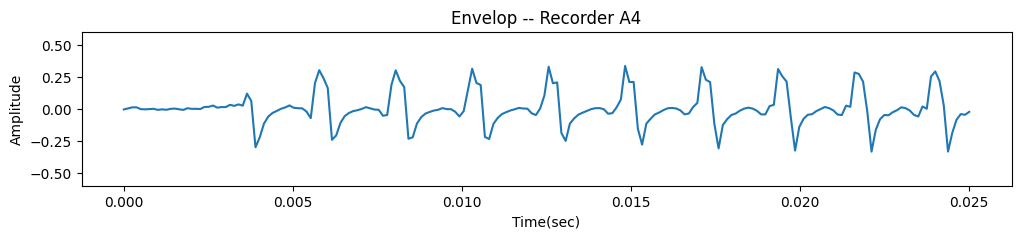

In [9]:
g_fs, g_data = read('data/guitar_A4.wav')
plot_wave(g_fs, g_data[1800:2000], 'Envelop -- Recorder A4', ylim=(-0.6, 0.6), max=2**15)

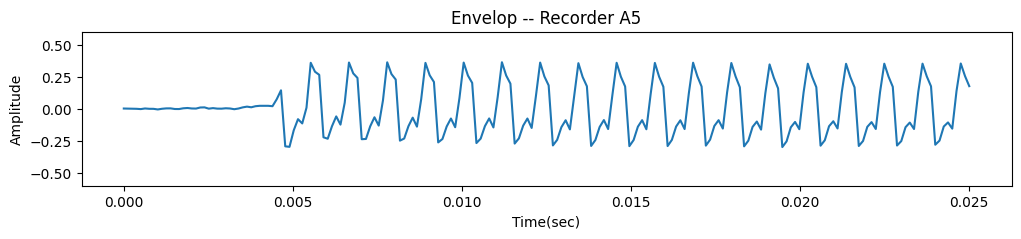

In [10]:
g_fs, g_data = read('data/guitar_A5.wav')
plot_wave(g_fs, g_data[1800:2000], 'Envelop -- Recorder A5', ylim=(-0.6, 0.6), max=2**15)

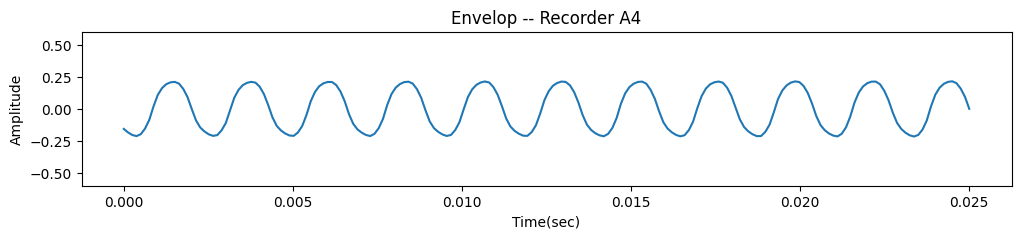

In [11]:
r_fs, r_data = read('data/recorder_A4.wav')
plot_wave(r_fs, r_data[2800:3000], 'Envelop -- Recorder A4', ylim=(-0.6, 0.6), max=2**15)

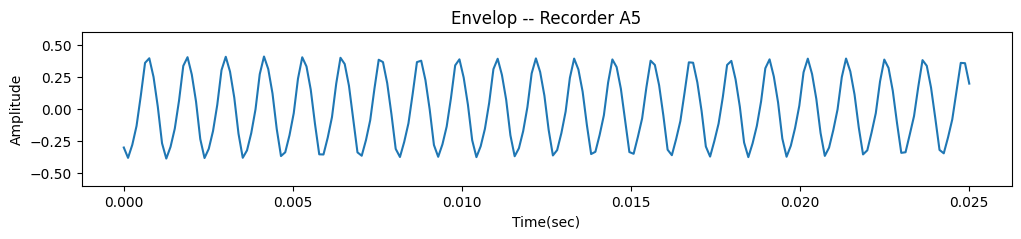

In [12]:
r_fs, r_data = read('data/recorder_A5.wav')
plot_wave(r_fs, r_data[2800:3000], 'Envelop -- Recorder A5', ylim=(-0.6, 0.6), max=2**15)

## Sine wave

In [13]:
class SineWave:

    def __init__(self, A, fs, f):
        self.A = A
        self.fs = fs
        self.f = f
        self.ff = 2 * np.pi * f / fs

    def a(self, n):
        return self.A * np.sin(self.ff * n)

In [14]:
fs = 8000
num = fs * 140  # 140 sec
A = 10.0
s = SineWave(A, fs, 440)
n = np.linspace(0., num/fs, num)
data = s.a(n)

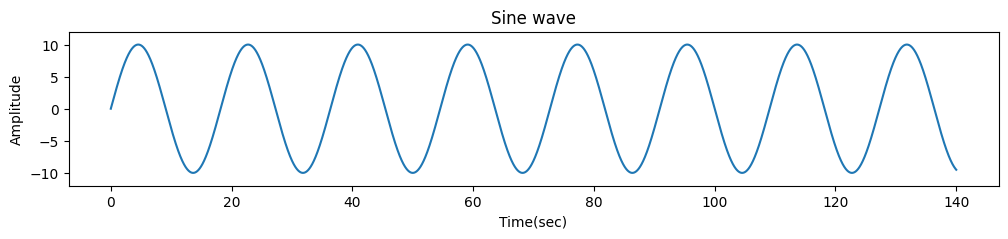

In [15]:
plot_wave(fs, data, 'Sine wave', ylim=(-12, 12))

## Sawtooth Wave

$h_i = if_0 \; (i\geq2)$

$s(n) = A \, sin(\dfrac{2 \pi f_0 n}{f_s}) + \dfrac{A}{2} \, sin(\dfrac{2 \pi h_2 n}{f_s}) + \dfrac{A}{3} \, sin(\dfrac{2 \pi h_3 n}{f_s}) + \cdots + \dfrac{A}{i} \, sin(\dfrac{2 \pi h_i n}{f_s})$

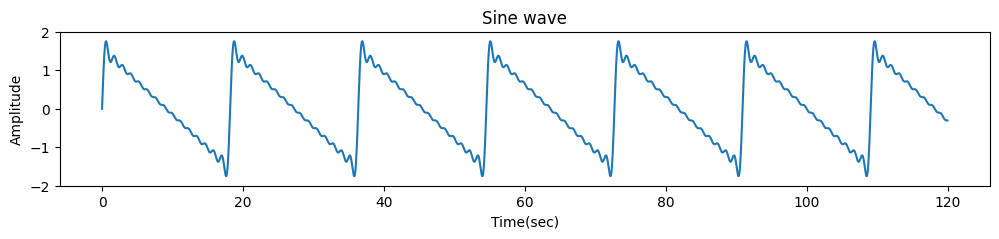

In [16]:
data = None

num = fs * 120  # 120 sec
n = np.linspace(0., num/fs, num)

for i in range(1, 16):
    f = 440 * i
    s = SineWave(1/i, fs, f)
    if data is not None:
        data += s.a(n)
    else:
        data = s.a(n)

plot_wave(fs, data, 'Sine wave', ylim=(-2, 2))